In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
print(os.listdir("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training"))


['02-moderate', '01-minor', '03-severe']


In [11]:
# Function to rename multiple files
def main():
    i = 0
    path="/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/03-severe/"
    for filename in os.listdir(path):
        my_dest ="severe_" + str(i) + ".jpeg"
        my_source =path + filename
        my_dest =path + my_dest
        # rename() function will
        # rename all the files
        os.rename(my_source, my_dest)
        i += 1
# Driver Code
if __name__ == '__main__':
    # Calling main() function
    main()

In [3]:
train_car_images = []
train_car_labels = [] 
for directory_path in glob.glob("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/*"):
    car_label = directory_path.split("\\")[-1]
    print(car_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):       
            img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
            if img is None:
                print('Wrong path:', img_path)
            else:
                img = cv2.resize(img, (128, 128))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                train_car_images.append(img)
                train_car_labels.append(car_label)
train_car_images = np.array(train_car_images)
train_car_labels = np.array(train_car_labels)

/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/02-moderate
/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/01-minor
Wrong path: /Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/01-minor/minor_368.jpeg
/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/03-severe


In [4]:
train_car_images.shape, train_car_labels.shape

((7566, 128, 128, 3), (7566,))

In [19]:
# Get the unique class values and their counts from y_train_subset
unique_classes, class_counts = np.unique(train_car_labels, return_counts=True)

for i in range(len(unique_classes)):
    print("Class {}: {} samples".format(unique_classes[i], class_counts[i]))

Class /Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/01-minor: 2480 samples
Class /Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/02-moderate: 2523 samples
Class /Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/03-severe: 2563 samples


In [5]:
label_to_id = {v:i for i,v in enumerate(np.unique(train_car_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
train_label_ids = np.array([label_to_id[x] for x in train_car_labels])


In [6]:
train_label_ids.shape

(7566,)

In [7]:
label_to_id

{'/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/01-minor': 0,
 '/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/02-moderate': 1,
 '/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/03-severe': 2}

In [8]:
train_car_images.shape

(7566, 128, 128, 3)

In [15]:
train_label_ids.shape


(7566,)

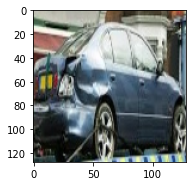

In [11]:
plt.subplot(121)
img = np.reshape(train_car_images[100], (128,128,3))
plt.imshow(img)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train_car_images, train_label_ids, test_size=0.2, random_state=42)


In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6052, 128, 128, 3), (1514, 128, 128, 3), (6052,), (1514,))

In [14]:
# Save the augmented data to files
np.savez_compressed('/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/numpy_data_CNN_128*128.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [21]:
my_arrays_final = np.load("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/numpy_data_CNN_128*128.npz", allow_pickle=True)


In [22]:
# Extract the X_train, y_train, X_test, and y_test arrays from the data
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [23]:
# Print the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6052, 128, 128, 3)
y_train shape: (6052,)
X_test shape: (1514, 128, 128, 3)
y_test shape: (1514,)
